In [326]:
import pandas as pd # type: ignore
from sklearn.datasets import load_iris # type: ignore
iris = load_iris()

In [327]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [328]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [329]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [330]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [331]:
df['target'] = iris.target

In [332]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [333]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [334]:
df[df.target==2].head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target  
100       2  
101       2  
102       2  
103       2  
104       2

In [335]:
## the lambda function maps each target name to either "setosa", "versicolor" or "virginica"
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])

In [336]:
df['flower_name']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: flower_name, Length: 150, dtype: object

In [337]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [338]:
from matplotlib import pyplot as plt
%matplotlib inline

In [339]:
## the below line code creates a 
# new DataFrame df0 containing only the rows from df where the value in the target column is 0.

df0 = df[df.target==0] # setosa
df1 = df[df.target==1] # versicolor
df2 = df[df.target==2] # virginica

In [340]:
df2.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
100                6.3               3.3                6.0               2.5   
101                5.8               2.7                5.1               1.9   
102                7.1               3.0                5.9               2.1   
103                6.3               2.9                5.6               1.8   
104                6.5               3.0                5.8               2.2   

     target flower_name  
100       2   virginica  
101       2   virginica  
102       2   virginica  
103       2   virginica  
104       2   virginica

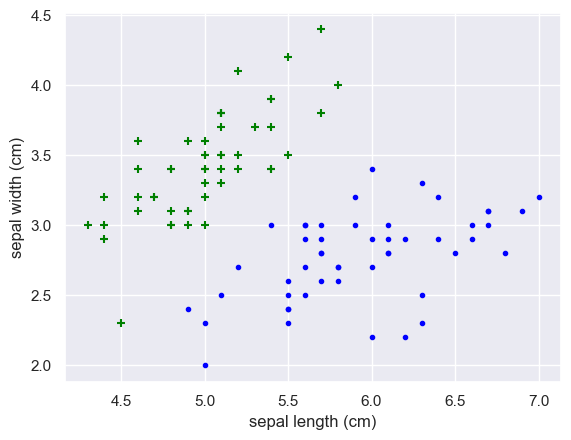

In [341]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.')

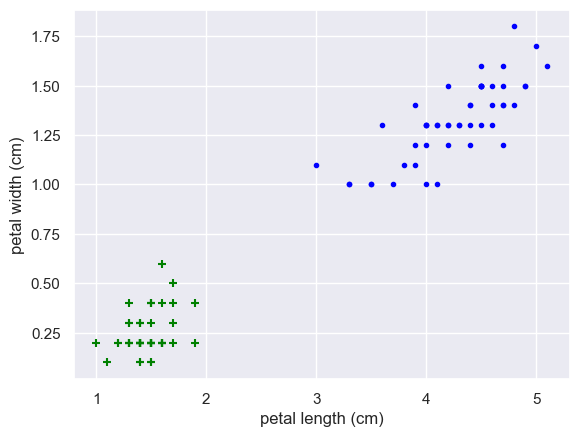

In [342]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='.')

In [343]:
from sklearn.model_selection import train_test_split

In [344]:
X = df.drop(['target', 'flower_name'], axis='columns')
X.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [345]:
y = df.target

In [346]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [347]:
len(X_train)

120

In [348]:
len(X_test)

30

In [349]:
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [350]:
model.fit(X_train, y_train)

SVC(kernel='linear')

In [351]:
model.score(X_test, y_test)

0.9666666666666667

In [352]:
# print(help(model))

In [353]:
pred = model.predict(X_test)
# 0 = setosa
# 1 = versicolor
# 2 = virginica
print("model score is:", model.score(X_test, y_test))

model score is: 0.9666666666666667


In [354]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
3                  4.6               3.1                1.5               0.2
123                6.3               2.7                4.9               1.8
140                6.7               3.1                5.6               2.4
106                4.9               2.5                4.5               1.7
95                 5.7               3.0                4.2               1.2
91                 6.1               3.0                4.6               1.4
144                6.7               3.3                5.7               2.5
36                 5.5               3.5                1.3               0.2
64                 5.6               2.9                3.6               1.3
7                  5.0               3.4                1.5               0.2
16                 5.4               3.9                1.3               0.4
50                 7.0               3.2                4.7     

In [355]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, pred)

In [356]:
mat

array([[ 8,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  9]])

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted

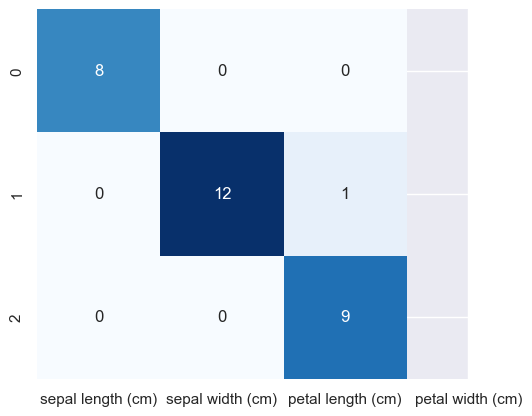

In [357]:
import seaborn as sns; sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=iris.feature_names, cmap='Blues')
print(plt.colormaps)

In [358]:
model.score(X_test, y_test)

0.9666666666666667

In [359]:
import numpy as np
from sklearn.linear_model import LogisticRegression

In [360]:
X = pd.concat([df0[['sepal length (cm)', 'sepal width (cm)']], df1[['sepal length (cm)', 'sepal width (cm)']]])
y = pd.concat([df0['target'], df1['target']])

In [361]:
newModel = LogisticRegression()
newModel.fit(X, y)

LogisticRegression()

In [362]:
## the h variable is how far way each data point is from each other
h = 0.1

# This line of code calculates the minimum and maximum values for the 'sepal length (cm)' column 
# in the DataFrame X and extends the range by 1 unit on both sides.
x_min, x_max = X['sepal length (cm)'].min() - 1, X['sepal length (cm)'].max() + 1
y_min, y_max = X['sepal width (cm)'].min() - 1, X['sepal width (cm)'].max() + 1

## this line of code creates a 2d grid for sepal lenght (cm) and sepal width (cm)

## the np.arange part of the code generates a value in the range of x_min and x_max with 
# the size of the h variable
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

C:\Users\Kylek\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


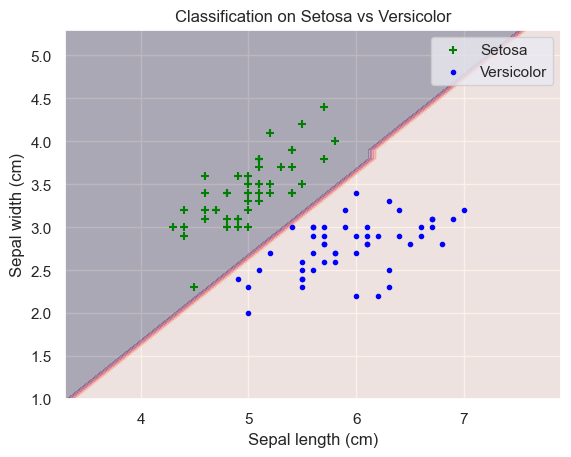

In [363]:
## here I convert xx and yy from a 2d array to be a 1d array. I do this due to the predict 
## function taking in a 1d array. The np.c_ this part of the code concatenates the xx.ravel() and yy.ravel()
## this results in a 2d array, that contains an x and a y value.
Z = newModel.predict(np.c_[xx.ravel(), yy.ravel()])

## this line of code reshapes the 1d array back into a 2d array, with the same shape as xx and yy.
## this must be done for plotting the xx and yy on a grid.
Z = Z.reshape(xx.shape)

## this line of code is used to draw regions that represent the classes on the grid.
## the alpha part of the code sets the transparency of the contour plot
# making it semi-transparent so that the original data points can be still seen.
plt.contourf(xx, yy, Z, alpha=0.3) 
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+', label='Setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.', label='Versicolor')

plt.title('Classification on Setosa vs Versicolor')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.legend()
plt.show()

In [364]:
## below is a function that uses my support vector machine model ## 
def SVMDeploy(data, labels, inputData):
    model = SVC(kernel='linear')
    model.fit(data, labels)
    prediction = model.predict([inputData])
    print("model predicted:", prediction[0])

In [365]:
ARR = np.array([[5.1, 3.5, 1.4, 0.2],  # Setosa
                [7.0, 3.2, 4.7, 1.4],  # Versicolor
                [6.3, 3.3, 6.0, 2.5]]) # Virginica example

y = np.array([0, 1, 2])

flower = np.array(ARR[0])


In [366]:
SVMDeploy(ARR, y, flower)

model predicted: 0
